# Ungraded Lab: Practice with the Keras Functional API

This lab will demonstrate how to build models with the Functional syntax. You'll build one using the Sequential API and see how you can do the same with the Functional API. Both will arrive at the same architecture and you can train and evaluate it as usual.

## Imports

In [25]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
# from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
import pydot
from tensorflow.keras.models import Model

## Sequential API

Here is how we use the `Sequential()` class to build a model.

In [26]:
def build_model_with_sequential():
    
    # instantiate a Sequential class and linearly stack the layers of your model
    seq_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    return seq_model

## Functional API

And here is how you build the same model above with the functional syntax.

In [27]:
def build_model_with_functional():
    
    # instantiate the input Tensor
    input_layer = tf.keras.Input(shape=(28, 28))
    
    # stack the layers using the syntax: new_layer()(previous_layer)
    flatten_layer = tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)
    
    # declare inputs and outputs
    func_model = Model(inputs=input_layer, outputs=output_layer)
    
    return func_model

## Build the model and visualize the model graph

You can choose how to build your model below. Just uncomment which function you'd like to use. You'll notice that the plot will look the same.

/opt/homebrew/Caskroom/miniconda/base/envs/env-tensorflow-advanced/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


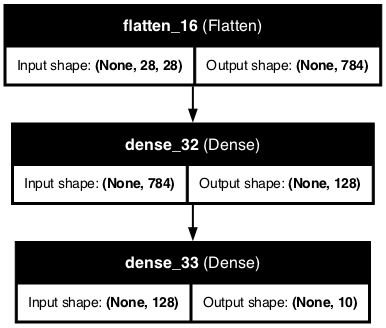

In [28]:
# model = build_model_with_functional()
sequential_model = build_model_with_sequential()
# Plot model graph
plot_model(sequential_model, show_shapes=True, show_layer_names=True,dpi=72 )

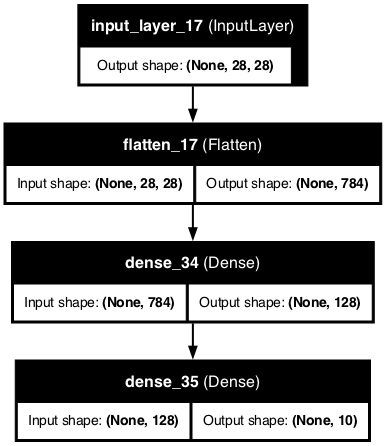

In [29]:
functional_model = build_model_with_functional()
# Plot model graph
plot_model(functional_model, show_shapes=True, show_layer_names=True,dpi=72 )

## Training the model

Regardless if you built it with the Sequential or Functional API, you'll follow the same steps when training and evaluating your model.

In [30]:
# prepare fashion mnist dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 24s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step


In [31]:
# configure, train, and evaluate the model
sequential_model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
sequential_model.fit(training_images, training_labels, epochs=5)
sequential_model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.7818 - loss: 0.6334
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.8627 - loss: 0.3838
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - accuracy: 0.8751 - loss: 0.3419
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.8836 - loss: 0.3207
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.8897 - loss: 0.3013
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.8666 - loss: 0.3743


[0.3793241083621979, 0.8672999739646912]

In [32]:
# configure, train, and evaluate the model
functional_model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
functional_model.fit(training_images, training_labels, epochs=5)
functional_model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - accuracy: 0.7812 - loss: 0.6275
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.8618 - loss: 0.3827
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - accuracy: 0.8773 - loss: 0.3375
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step - accuracy: 0.8841 - loss: 0.3115
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 901us/step - accuracy: 0.8926 - loss: 0.2905
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.8748 - loss: 0.3457


[0.34813353419303894, 0.8758999705314636]